<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я проверяла твой первый проект и буду проверять этот.

Напомню про цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
Снова **ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> работа очень объемная и непростая, ты молодец. Структура хорошая, много анализа и выводов. Однако я не могу провести полноценную проверку, т.к. указан локальный путь к файлу. Исправь, пожалуйста. 
    

</div>    


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 2</b>
    
Спасибо за исправление. Я оставила новые комментарии с цифрой 2. Несколько вопросов только. Корректировки не должны занять много времени. 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 3</b>
    
Новые комментарии с цифрой 3 теперь. 2 вопроса остались. 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 4</b>
    
Новые комментарии я уже не оставляла, чтобы не сбивать содержание, со старых сняла заголовки.  Проект я могу принять, поскольку вопросов больше нет. Желаю успехов в дальнейшем обучении :) 
</div>

# Проект 3 - Рыночная стоимость объектов недвижимости

## Введение

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Задача — установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных: первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**

В таблице 22 столбца:

1. `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
2. `balcony` — число балконов
3. `ceiling_height` — высота потолков (м)
4. `cityCenters_nearest` — расстояние до центра города (м)
5. `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
6. `first_day_exposition` — дата публикации
7. `floor` — этаж
8. `floors_total` — всего этажей в доме
9. `is_apartment` — апартаменты (булев тип)
10. `kitchen_area` — площадь кухни в квадратных метрах (м²)
11. `last_price` — цена на момент снятия с публикации
12. `living_area` — жилая площадь в квадратных метрах (м²)
13. `locality_name` — название населённого пункта
14. `open_plan` — свободная планировка (булев тип)
15. `parks_around3000` — число парков в радиусе 3 км
16. `parks_nearest` — расстояние до ближайшего парка (м)
17. `ponds_around3000` — число водоёмов в радиусе 3 км
18. `ponds_nearest` — расстояние до ближайшего водоёма (м)
19. `rooms` — число комнат
20. `studio` — квартира-студия (булев тип)
21. `total_area` — площадь квартиры в квадратных метрах (м²)
22. `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Очень хорошо, что есть описание задачи и данных.     
</div>

## Предобработка данных

Для начала проверим какие данные нам достались. Нас интересуют:

1. Простые артефакты
2. Пропущенные значения и типы данных
3. Дополнительные параметры

Пойдем по порядку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Я привык сохранять исходный датасет, чтобы можно было проследить какие преобразования были совершены.
raw_properties = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_properties = raw_properties.copy()

# Посмотрим размеры датасета
print('-' * 50)
print('Размер датасета (строки, столбцы):', df_properties.shape)
print('-' * 50)

# Выведем на экран информацию о датасете
df_properties.info()

--------------------------------------------------
Размер датасета (строки, столбцы): (23699, 22)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCe

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Локальный путь.</div>

Во-первых, колонки уже имеют более-менее нормальный тип данных (целочисленное количество этажей `floor`, например). За исключением `is_apartment`, которая явно должна быть `bool`, а также парочки других виноватых.

Во-вторых, колонки имеют разное количество строк. Это говорит о том, что некоторые значения отсутствуют.

В-третьих, непохоже, что у нас нет идентификаторов категорий, которые можно вынести в отдельные словари.

In [2]:
# Причешем это безобразие
df_properties.rename(columns={'cityCenters_nearest': 'city_center_nearest',
                              'studio': 'is_studio',
                              'open_plan': 'is_open_plan',
                              'locality_name': 'location_name',
                              'ponds_around3000': 'ponds_around_3km',
                              'parks_around3000': 'parks_around_3km'}, inplace=True)

# Выведем на экран первые строчки
display(df_properties.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,location_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


По первым 10 строчкам уже видно, что нас ждут приключения!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
😊</div>

### Простые артефакты

В наших данных есть небольшое количество строк с явно странными значениями, которые будут дальше мешать нам жить.

In [3]:
# Посмотрим, что за значения внутри
display(round(df_properties[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()))

,total_area,last_price,rooms,ceiling_height
count,23699.0,23699.0,23699.0,14504.0
mean,60.0,6541549.0,2.0,3.0
std,36.0,10887013.0,1.0,1.0
min,12.0,12190.0,0.0,1.0
25%,40.0,3400000.0,1.0,3.0
50%,52.0,4650000.0,2.0,3.0
75%,70.0,6800000.0,3.0,3.0
max,900.0,763000000.0,19.0,100.0


Сразу видно виноватых: у нас есть `total_area` почти 900 м^2, `last_price` в 763М рублей (!), и `ceiling_height` 100 м. Первые два артефакта, скорей всего, настоящие квартиры, просто очень большие. Последний же артефакт - явно ошибка.

Посмотрим как это выглядит на графиках.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Да, выбросов немало. 


</div>

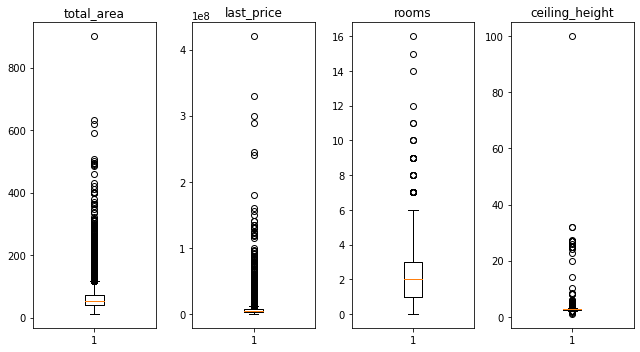

In [4]:
def fun_get_boxplots_for_columns(df, columns, num_rows, num_columns):
    """
    This function creates a num_rows x num_columns box subplots for a list of columns out of the dataset.

    Args:
        df (DataFrame): dataframe with data to show
        columns (List): list of columns to plot
        num_rows (int): number of rows in subplots
        num_columns (int): number of columns in subplots
    """
    # Для начала коробки с усами
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(9, 5))

    # Добавим каждый бокс-с-усами к фигуре
    for i, ax in enumerate(axs.flat):
        ax.boxplot(df[columns].dropna().iloc[:, i])
        ax.set_title(df[columns].columns[i])

    # Сделаем нормальный формат графиков и удалим ненужные переменные
    plt.tight_layout()

fun_get_boxplots_for_columns(df_properties, ['total_area', 'last_price', 'rooms', 'ceiling_height'], 1, 4)

У нас очень много выбивающихся значений!
1. С `total_area` ситуация выглядит более-менее правдоподобно - у нас могут быть квартиры любого размера.
2. В `rooms` у нас есть нули - это, вероятно квартиры-студии. Сделаем их всех однокомнатными. Также у нас есть квартиры-отели с более чем 10 комнатами. Избавимся от них тоже.
3. У `last_price` есть длинный хвост из больших и редких значений - я думаю, что его надо обрезать где-то на `5e7` (это также обрежет все остальные колонки).
4. Наконец, `ceiling_height` тоже странный хвост из значений более 5 метров. Их мы тоже обрежем, т.к. нас не интересуют ангары в этом упражнении.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Вот здесь обрезал подозрительные значения. Аргумент в том, что квартира еще может стоить 40 млн рублей (красиво жить в центре Питера не запретишь!). Такое ограничение по цене также обрежет всякие дворцы с 700 кв. м площади. Взял 40, потому что по гистрограммам видно, что там как-то трепыхаются еще значения - не хотелось их выбрасывать.

</div>

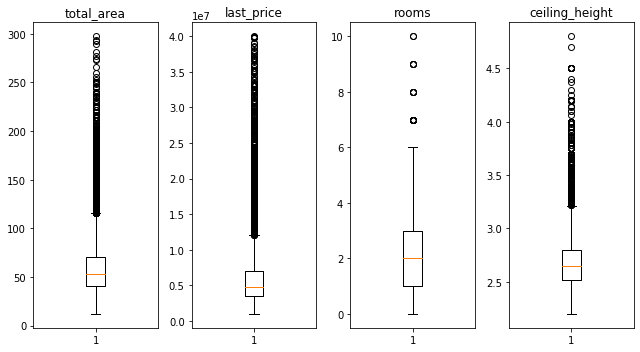

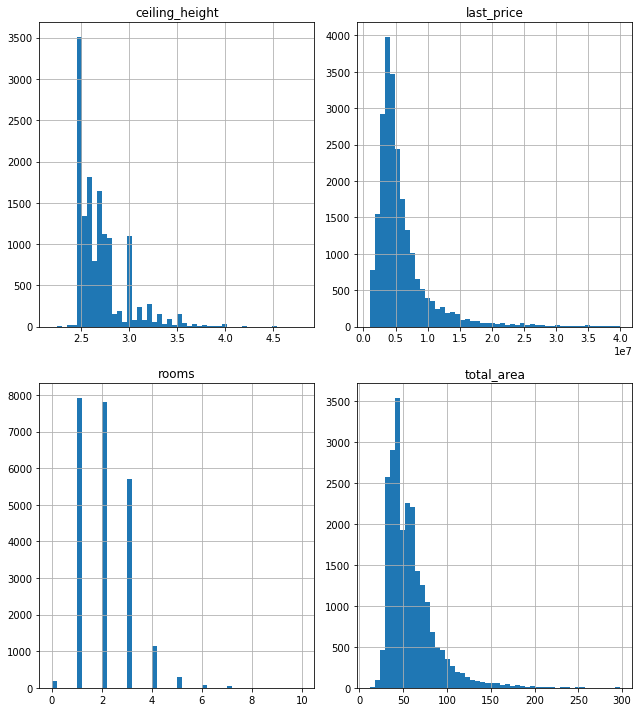

In [5]:
# Уберем странные значения из ceiling_height
df_properties = df_properties[(df_properties.ceiling_height < 5) &
                              (df_properties.ceiling_height > 2) |
                              (df_properties.ceiling_height.isna())]

# Уберем странные значения из last_price
df_properties = df_properties[(df_properties.last_price < 4e7) &
                              (df_properties.last_price > 1e6)]

# Уберем странные значения из total_area
df_properties = df_properties[(df_properties.total_area < 300) &
                              (df_properties.total_area > 10)]

# Уберем странные значения к rooms
df_properties = df_properties[df_properties.rooms <= 10]

# Посмотрим на новую коробку-с-усами
fun_get_boxplots_for_columns(df_properties, ['total_area', 'last_price', 'rooms', 'ceiling_height'], 1, 4)

# Посмотрим на гистрограммы: площадь, цена, число комнат, высота потолков
df_properties[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(bins=50, figsize=(9, 10))

# Нормальный формат графика
plt.tight_layout()

### Пропущенные значения и типы данных

Сначала разберемся с попущенными значениями - глядишь, некоторые из них можно восстановить.

In [6]:
# Найдем колонки с пропущенными значениями через функцию - нам надо будет сделать это пару раз
def fun_get_columns_with_nan(df):
    """
    This function returns a list of column names, which have NaN values from an input data frame.

    Args:
        df (DataFrame): A dataframe to check

    Returns:
        columns_with_nan (list): A list of column names which have NaNs inside 
    """
    # Пустой лист
    columns_with_nan = []

    # Найдем виноватых
    for column in df.columns:
        if df[column].isna().sum() > 0:
            columns_with_nan.append(column)
    return columns_with_nan

# Посмотрим на них
display(df_properties[fun_get_columns_with_nan(df_properties)].head())

,ceiling_height,floors_total,living_area,is_apartment,kitchen_area,balcony,location_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,2.70,16.0,51.0,NaN,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,11.0,18.6,NaN,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,NaN,5.0,34.3,NaN,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,3.03,14.0,32.0,NaN,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,NaN,12.0,14.4,NaN,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Здорово, что используешь строки документации. Это хороший тон :)</div>

Начнем заполнять. `is_apartment` - думаю, правильно предположить, что если `NaN`, то значение должно быть `False`. Количество балконов `balcony`, если не указано, что, вероятно, равно нулю.

`ceiling_height`, `kitchen_area` и `living_area` можно попробовать вычислить как пропорциональные значения от суммарной площади квартиры `total_area` в зависимости от количества комнат.

Наконец, `floors_total`, `location_name` и `days_exposition` - придется оставить пустыми. Значения в этих колонках нельзя найти логическими путями и они не зависят от других колонок.

Скорей всего, человек просто не ввел все эти данные, когда оставлял объявление.

Колонку `city_center_nearest` придется тоже оставить в покое, т.к. точного адреса у нас нет. Видимо, автоматические алгоритмы не определили какой город ближайший.

Остальные колонки `airports_nearest`, `parks_around_3km`, `parks_nearest`, `ponds_around_3km`, `ponds_nearest` мы убьем, потому что в задании они не используются.

In [7]:
# Уберем колонки, которые не нужны
df_properties.drop(['airports_nearest',
                    'parks_around_3km',
                    'parks_nearest',
                    'ponds_around_3km',
                    'ponds_nearest'], axis=1, inplace=True)

Разберемся с пропусками.

In [8]:
# Eсли пусто - сделаем False для is_apartment
df_properties.is_apartment.fillna(False, inplace=True)

# Если пусто - сделаем 0 для balcony
df_properties.balcony.fillna(0, inplace=True)

# Если ноль - сделаем 1 для rooms
df_properties.rooms.replace(0, 1, inplace=True)

# Разберемся с ceiling_height
df_properties.ceiling_height.fillna(df_properties
                                    .groupby('rooms')
                                    .ceiling_height
                                    .transform('mean'), inplace=True)

# Найдем какую долю от общей площади составляют living_area & kitchen_area
df_properties['living_to_total_area'] = df_properties.living_area / df_properties.total_area
df_properties['kitchen_to_total_area'] = df_properties.kitchen_area / df_properties.total_area

# Заполним пропущенные значения для living_to_total_area и kitchen_to_total_area
df_properties.living_to_total_area.fillna(df_properties
                                    .groupby('rooms')
                                    .living_to_total_area
                                    .transform('mean'), inplace=True)

df_properties.kitchen_to_total_area.fillna(df_properties
                                    .groupby('rooms')
                                    .kitchen_to_total_area
                                    .transform('mean'), inplace=True)

# Заполним пропущенные значения для living_area и kitchen_area
df_properties.living_area.fillna( df_properties.living_to_total_area * df_properties.total_area, inplace=True )
df_properties.kitchen_area.fillna( df_properties.kitchen_to_total_area * df_properties.total_area, inplace=True )

# Посмотрим что получилось
print('Количество пропущенных значений, которые вырезали из датасета:',
      len(raw_properties) - len(df_properties))
print('Доля пропущенных значений, которые вырезали из датасета:',
      round(len(df_properties) / len(raw_properties), 2), '%' )
print('Количество пропущенных значений, которые оставили в датасете:')
print(df_properties[fun_get_columns_with_nan(df_properties)].isna().sum())

Количество пропущенных значений, которые вырезали из датасета: 511
Доля пропущенных значений, которые вырезали из датасета: 0.98 %
Количество пропущенных значений, которые оставили в датасете:
floors_total             85
location_name            49
city_center_nearest    5251
days_exposition        3070
dtype: int64


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Отличная идея с отношением площадей.</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Замены лучше делать на медианы.


Пропуски в населенных пунктах можно даже удалить. Мы не можем быть уверены, что эти квартиры принадлежат Лен. области.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Света, и снова здравствуйте. Я уже обрезал датасеты по цене на квартиры, поэтому больших выбросов быть не должно (это будет еще релеватно к твоему следующему комментарию - смотри пункт 4.1). Из этих предположений брал среднее. К тому же, мы заполняем не медианой по всей выборке, а средним в рамках каждой категории по количеству комнат. Я почитал еще про замены и четкой методички не нашел. Но разумный аргумент был, что если много выборосов - то медиана, если нет - то среднее.

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера 3 ✔️</b>
    
Все это верно, не спорю. Да, группировка тоже делает заполнение более точным. 
    
    
    
Однако иногда выбросы или ошибки могут быть не очень заметны, скажем так. Поэтому лучше всегда брать медиану, с ней мы точно не ошибемся. Если распределение скошено, то хорошо, ведь медиана все это учтет. Если распределение нормальное или околонормальное, то тоже хорошо, потому что медиана совпадет со средним или будет очень близка к нему. В любом случае, мы ничего не теряем и уберегаем себя от влияния ошибок или выбросов, которые могли не заметить. Вот для чего был написан комментарий.  </div>

Выглядит уже хорошо - всего 1% данных выбросили из датасета. Хотя еще почти 25% строк не имеют значений в колонке `city_center_nearest`, которая нам понадобится даже в анализе.

Посденим шагом в этой главе исправим типы данных в колонках.

In [9]:
display(df_properties.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23188 entries, 0 to 23698
Data columns (total 19 columns):
total_images             23188 non-null int64
last_price               23188 non-null float64
total_area               23188 non-null float64
first_day_exposition     23188 non-null object
rooms                    23188 non-null int64
ceiling_height           23188 non-null float64
floors_total             23103 non-null float64
living_area              23188 non-null float64
floor                    23188 non-null int64
is_apartment             23188 non-null bool
is_studio                23188 non-null bool
is_open_plan             23188 non-null bool
kitchen_area             23188 non-null float64
balcony                  23188 non-null float64
location_name            23139 non-null object
city_center_nearest      17937 non-null float64
days_exposition          20118 non-null float64
living_to_total_area     23188 non-null float64
kitchen_to_total_area    23188 non-null floa

None

### Дополнительные параметры

В рамках нашего упражнения нам понадобятся несколько дополнительных колонок. Они будут использованы для классификации данных, а также для поиска зависимостей в них. Колонки, которые мы добавим:

1. Цена квадратного метра
2. День недели, месяц и год публикации объявления
3. Этаж квартиры: первый, последний или другой
4. Отношение жилой к общей площади и отношение площади кухни к общей

Последний пункт мы уже сделали в предыдущей главе для заполнения пропущенных значений.

In [10]:
# Цена квадратного метра
df_properties['price_per_sqm'] = df_properties.last_price /  df_properties.total_area

# День недели, месяц и год публикации объявления
df_properties['first_day_exposition'] = pd.to_datetime(df_properties.first_day_exposition)
df_properties['week_day'] = df_properties.first_day_exposition.dt.weekday
df_properties['month'] = df_properties.first_day_exposition.dt.month
df_properties['year'] = df_properties.first_day_exposition.dt.year

# Напишем функцию для категоризации этажей
def fun_floor_categorizer(df):
    """
    This function categorises floor number. It returns 'first', 'last' or 'other'

    Args:
        df (DataFrame): a dataframe with 'floors_total' and 'floor' columns

    Returns:
        (str): floor category
    """
    floor = df.floor
    floors_total = df.floors_total
    if (floor == floors_total) & (floor != 1):
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

# Сделаем категоризацию floor
df_properties['floor_type'] = df_properties.apply( fun_floor_categorizer, axis=1 )

## Исследовательский анализ данных

### Время продажи квартиры

Изучим время продажи квартиры: построим гистограмму, посчитаем среднее и медиану.

count    20118.000000
mean       179.984591
std        219.121233
min          1.000000
25%         45.000000
50%         95.000000
75%        229.750000
max       1580.000000
Name: days_exposition, dtype: float64

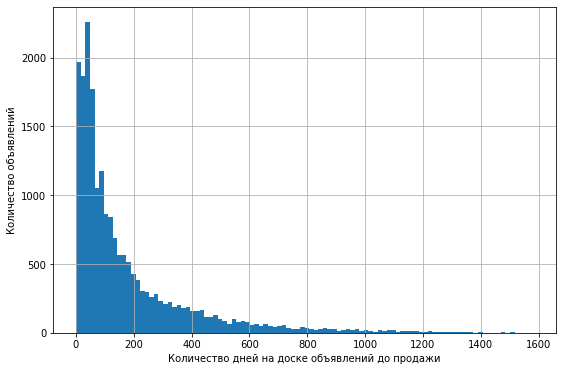

In [11]:
# График и основная статистика
df_properties.days_exposition.dropna().hist(bins=100, figsize=(9, 6));
plt.xlabel('Количество дней на доске объявлений до продажи')
plt.ylabel('Количество объявлений')
df_properties.days_exposition.describe()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Графики желательно подписывать (оси + заголовок).

</div>

**Вывод:** распеределение времени продажи имеет характерную форму: у нас есть небольшой пик в начале, а дальше длинный хвост значений в конце. Обычная (средняя) продажа займет около 180 дней, хотя половина всех продаж заняла менее 95 дней. Если квартира была продана меньше, чем за 45 дней - это очень быстро. А если более чем 230 дней - необычно долго.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ✔️</b>
    
Согласна. </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ❌</b>
    
Что делаем с  выбросами? Они искажают результаты. Тем более, если речь про коэфф-ты корреляции. Обрати внимание на минимумы и максимумы: </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
смотри выше! Поставил камент, где отрезал выбросы. Цена в 39 999 000 не случайная!

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 3 ❌</b>
    
Я все прекрасно вижу. Только я не видела, чтобы квартира за 12 тысяч рублей и квартиры площадью под 500 метров (при максимальной цене всего в 40 млн) намеренно оставались в выборке. 40 млн меня как раз не смущает. Да, можно найти за 50-60 млн 400-500 метров. Но таких квартир на весь город сколько будет? В этом и суть выбросов. Это не нереальные значение - это редкие значения. А вот про 40 млн не спорю, довольно часто такое попадается. Чаще, чем 300 и более квадратов.   </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Справедливо - обрезал!

</div>

In [12]:
# КОД РЕВЬЮЕРА

df_properties[['last_price', 'total_area','rooms' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms
min,1010000.0,12.0,1.0
max,39990000.0,297.5,10.0


### Факторы влияющие на стоимость квартиры

Посмотрим, что влияет на стоимость квартиры во всем датасете.

#### Параметры и расположение квартиры

Для начала возьмем колонки `last_price`, `total_area`, `rooms`, `city_center_nearest`.

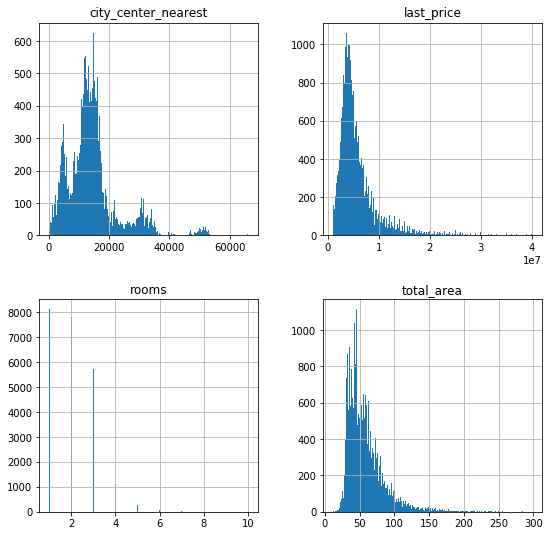

In [13]:
# Посмотрим на распределения
df_properties[['last_price', 'total_area', 'rooms', 'city_center_nearest']].hist(bins=200, figsize=(9, 9));

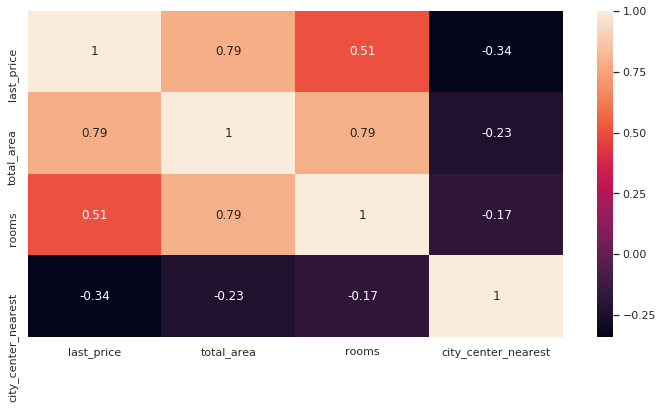

In [14]:
# И корреляционную матрицу
sns.set(rc = {'figure.figsize':(12, 6)})
sns.heatmap(df_properties[['last_price', 'total_area', 'rooms', 'city_center_nearest']].corr(), annot=True);

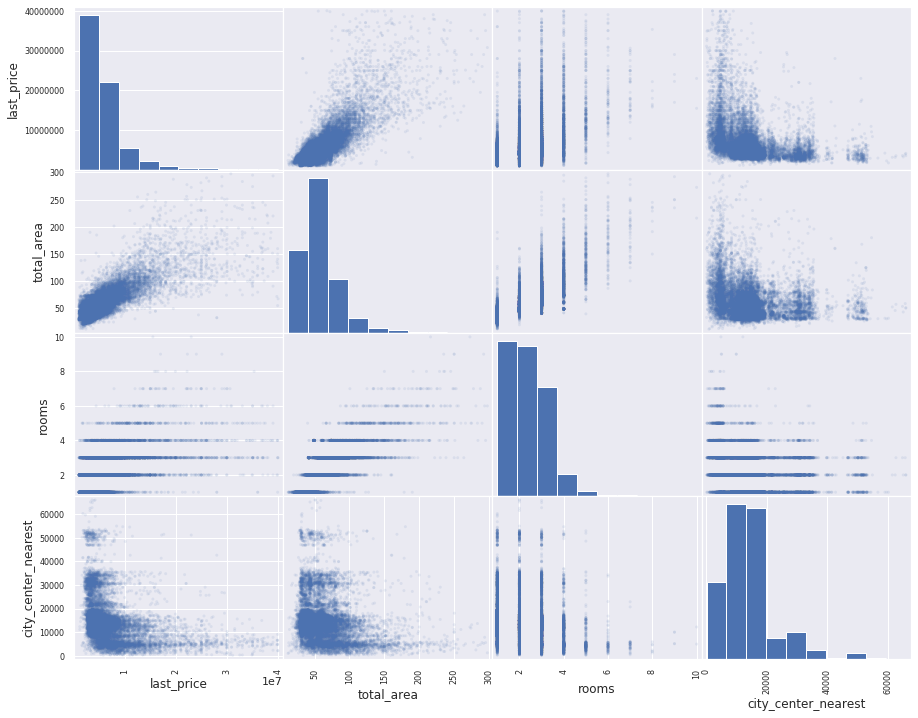

In [15]:
# Scatter plot
pd.plotting.scatter_matrix(df_properties[['last_price', 'total_area', 'rooms', 'city_center_nearest']],
                           alpha=0.1,
                           figsize=(15, 12));

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера 2 ❌</b>
    
Не забывай, что коэфф-т корреляции Пирсона это коэфф-т линейной связи. Ее отсутствие не влечет отсутствие связи как таковой, поскольку последняя может быть нелинейной. Так что лучше еще и на графики обращать внимание. Добавь, пожалуйста. Графики кривой и точечной диаграммы тут отлично подойдут. Точечная - если хочешь увидеть количество и разброс. Кривая - если хочешь просто зависимость или  динамику (например, по годам или для комнат). 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Fair enough - исправил. Гугол говорит, что scatter plots плохо перевариваются на больших датасетах. VS code почему-то у меня сильно страдал тоже. В Юпитере все красиво работает...

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  3 ✔️</b>
    
Да, такое бывает. 
    
    
    
Я только добавлю, что иногда удобно смотреть на кривые:    
</div>

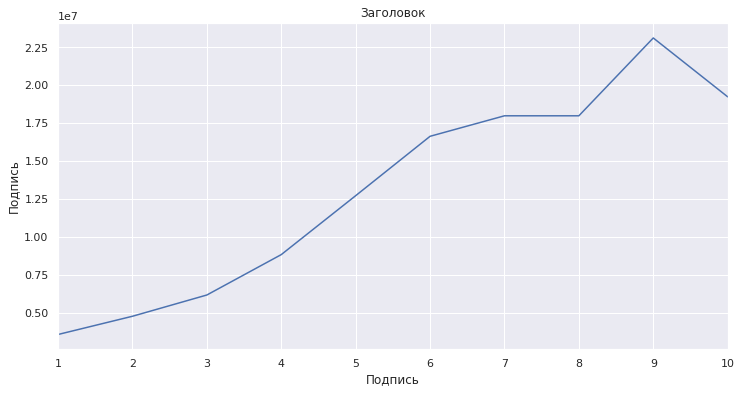

In [16]:
# КОД РЕВЬЮЕРА 3


df_properties.groupby('rooms')['last_price'].median().plot()


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

**Вывод:** Самым большим влиянием на цену оказывает площадь квартиры - что ожидаемо. Количество комнат также имеет некоторое влияние, но сильно меньше, чем площадь. Наконец, удаленность от центра имеет отрицательную корреляцию с ценой (чем расстояние меньше - тем цена выше) и является самым слабым фактором из трех.

#### Этаж квартиры и время размещения

Посмотрим теперь на зависимость от того, на каком этаже расположена квартира и даты размещения.

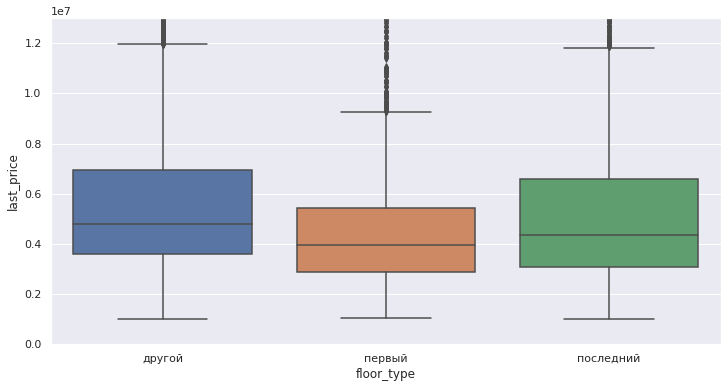

In [17]:
# Цена в зависимости от этажа
sns.boxplot(data=df_properties, x='floor_type', y='last_price');
plt.ylim([0, 1.3e7]);

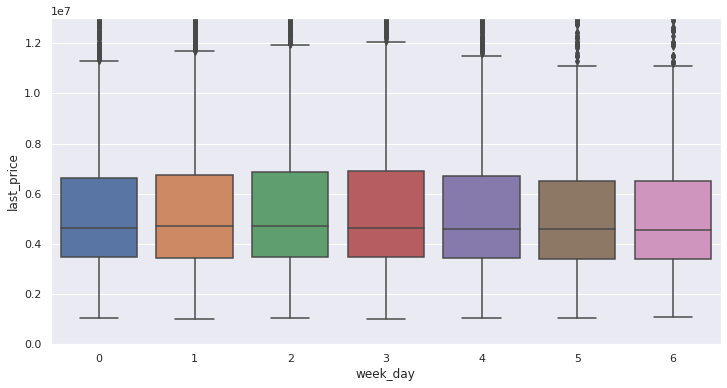

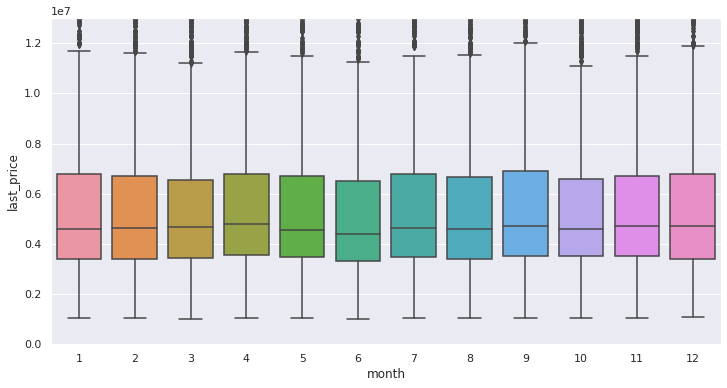

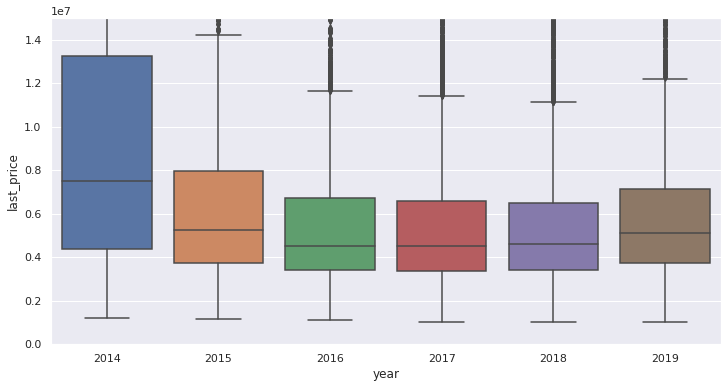

In [18]:
# Цена в зависимости от даты размещения - по дням
plt.figure()
sns.boxplot(data=df_properties, x='week_day', y='last_price');
plt.ylim([0, 1.3e7]);

# Цена в зависимости от даты размещения - по месяцам
plt.figure()
sns.boxplot(data=df_properties, x='month', y='last_price');
plt.ylim([0, 1.3e7]);

# Цена в зависимости от даты размещения - по годам
plt.figure()
sns.boxplot(data=df_properties, x='year', y='last_price');
plt.ylim([0, 1.5e7]);

**Вывод:** Цена явно зависит от этажа на котором находится квартира: квартиры на первом этаже более дешевые, чем на остальных этажах. Цена квартир на последнем этаже чуть сильнее варьируется, чем цена на других этажах, но это, вероятно связано с конкретными случаями: к примеру, жить в башне Меркурий на последнем этаже явно лучше, чем в пятиэтажной хрущевке.

Как и ожидалось, цена почти не зависит от дня недели или месяца подачи объявления - все распределения более-менее одинаковые. Цена по годам менялась заметно (предполагая, что остальные параметры одинаковые) - так в 2014 году вариативность цен была сильно выше, как и мединные занчения. После 2014 года был явный тренд на падение цен на недвижимость. Этот тренд начал разворот в 2019 году. Опять же, все эти выводы предварительные, т.к. в идеале надо убедиться, что внутри каждого среза остальные параметры (например, средняя площадь квартир) не поменялись.

#### Стоимость жилья по населенным пунктам

Посмотрим, как стоимость жилья меняется в топ-10 населенных пунктах по числу объявлений.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ✔️</b>
    
Согласна. Думаю, картина с месяцем и днем недели тянет на случайность. Ведь речь идет о дате размещения и о цене продажи. Разместить можно во вторник в мае, а продать в пятницу в ноябре, по более низкой цене. Это можно даже проверить, построив точно такие же графики для разных лет. Наверняка ситуация будет меняться. Хотя летом люди чаще думают об отпуске, чем о покупке квартиры, так что тут может быть связь. А вот год - да, вполне может влиять. Из года в год экономическая ситуация меняется, а вместе с ней и покупательская способность.
</div>

,location_name,ads_recorded,total_property_value,total_sqm_sold,price_per_sqm_avg
0,Санкт-Петербург,15480,1.094888e+11,962737.0,113727.0
1,посёлок Мурино,520,1.910010e+09,22955.0,83208.0
2,посёлок Шушары,440,1.807556e+09,23681.0,76328.0
3,Всеволожск,396,1.504783e+09,22221.0,67720.0
4,Пушкин,367,2.310074e+09,21959.0,105200.0
5,Колпино,337,1.302939e+09,17645.0,73843.0
6,посёлок Парголово,327,1.467600e+09,16848.0,87111.0
7,Гатчина,305,1.066469e+09,15506.0,68777.0
8,деревня Кудрово,299,1.266013e+09,13925.0,90917.0
9,Выборг,231,7.630530e+08,13096.0,58267.0


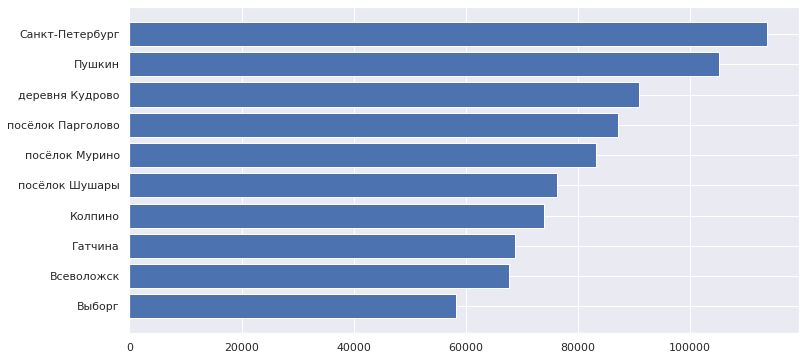

In [19]:
# Сведем данные в таблицу
pvt_top_10_locations = pd.pivot_table(
    data=df_properties,
    index='location_name',
    values=['last_price', 'total_area'],
    aggfunc={'last_price': ['count', 'sum'],
             'total_area': 'sum'})

# Переименуем колонки и отсортируем значения
pvt_top_10_locations.columns = ['ads_recorded', 'total_property_value', 'total_sqm_sold']
pvt_top_10_locations.sort_values(by='ads_recorded', ascending=False, inplace=True)

# Оставим топ-10
pvt_top_10_locations = pvt_top_10_locations.iloc[:10, :].reset_index()

# Посчитаем среднюю стоимость квадратного метра
pvt_top_10_locations['price_per_sqm_avg'] = pvt_top_10_locations.total_property_value / pvt_top_10_locations.total_sqm_sold

# Посмотрим на результат
display(round(pvt_top_10_locations))

# И на график
plt.barh(data=pvt_top_10_locations.sort_values(by='price_per_sqm_avg', ascending=True),
        width='price_per_sqm_avg',
        y='location_name');

**Выводы:** Санкт-Петербург сильно опережает остальные города в датасете по количеству объявлений - 15К штук против нескольких сотен в остальных городах. Санкт-Петербург также оказался самым дорогим (с точки зрения средней цены за квадратный метр городом). За ним следует Пушкин, а потом остальные поселки. Самым дешевым городом для покупки жилья оказался Выборг. Такое распределние цен ожидаемо: Питер, как культурная столица, привлекает больше людей, а значит имеет бОльший спрос на жилье.

#### Квартиры в центральной зоне Санкт-Петербурга

Проверим эмпирическим путем какой примерно радиус у центральной зоны Санкт-Петербурга.

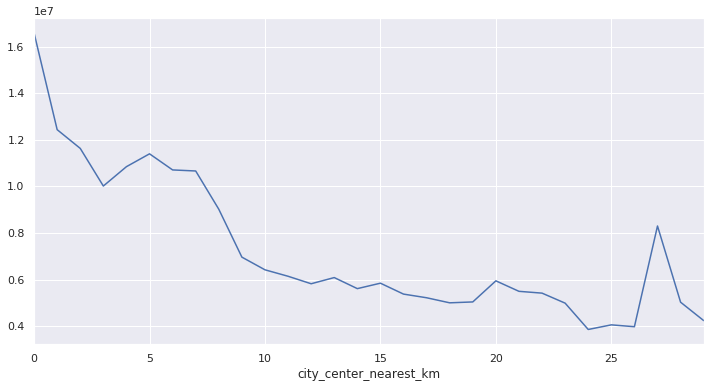

In [20]:
# Добавим расстояние до центра в км
df_properties['city_center_nearest_km'] = round(df_properties.city_center_nearest / 1e3)

# Возьмем объявления только в Питере и построим кривую
df_properties[df_properties.location_name == 'Санкт-Петербург'] \
    [['last_price', 'city_center_nearest_km']] \
    .dropna() \
    .sort_values(by='city_center_nearest_km') \
    .groupby('city_center_nearest_km')['last_price'].mean() \
    .plot(x='city_center_nearest_km', 
          y='last_price');

**Выводы:** по графику зависимости средней цены от расстояния до центра видно, что как только мы пересекаем 7-8 км, цена почти сразу уменьшается в два раза. Видимо, это и есть примерная граница центральной зоны. Интересно, что график довольно неравномерный: на расстоянии 5 км и ~27 км от центра у нас есть всплески средней цены. Скорей всего, это связано с какими-то конкретными районами.

#### Стоимость квартир в центральной зоне

Посмотрим от каких факторов зависит стоимость квартиры в центре. Для анализа возьмем колонки `total_area`, `last_price`, `rooms`, `ceiling_height`, `floor`, `city_center_nearest_km`, `first_day_exposition`.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Город не такой большой. 8 км захватит еще 3-4 района, помимо центра. Предлагаю 3 км. Подъем после 3 можно объяснить тем, что тут появляются особые квартиры с большей площадью, например, или с хорошим видом. И это действительно так и есть. Если взять 5-7 км от центра на север, то попадем на очень и очень дорогую недвижимость с чуть ли не лучшим видом в городе. Хотя это не будет центральным районом. Я тебе предлагаю брать меньший радиус, руководствуясь здравым смыслом: диаметр 16 км это как-то многовато.  Как ты считаешь? Понимаю, что формулировка сбивает, но все же :) 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Справедливо. Давай на 3 км согласимся.

</div>

,total_area,last_price,rooms,ceiling_height
count,822.0,822.0,822.0,822.0
mean,90.0,11256781.0,3.0,3.0
std,42.0,6343158.0,1.0,0.0
min,12.0,2100000.0,1.0,2.0
25%,62.0,7000000.0,2.0,3.0
50%,82.0,9350000.0,3.0,3.0
75%,110.0,13700000.0,4.0,3.0
max,298.0,39990000.0,8.0,5.0


,total_area,last_price,rooms,ceiling_height
count,23188.0,23188.0,23188.0,23188.0
mean,59.0,5924911.0,2.0,3.0
std,28.0,4475396.0,1.0,0.0
min,12.0,1010000.0,1.0,2.0
25%,40.0,3450000.0,1.0,3.0
50%,52.0,4650000.0,2.0,3.0
75%,69.0,6700000.0,3.0,3.0
max,298.0,39990000.0,10.0,5.0


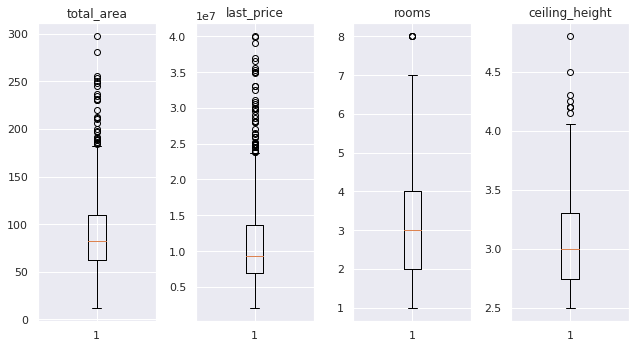

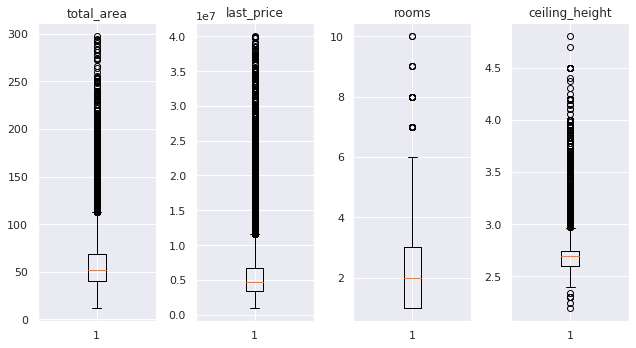

In [21]:
# Сохраним эти квартиры в отдельный датасет
pvt_properties_center = df_properties.loc[ df_properties.city_center_nearest_km <= 3, ['total_area',
                                                                                       'last_price',
                                                                                       'rooms',
                                                                                       'ceiling_height',
                                                                                       'floor',
                                                                                       'city_center_nearest_km',
                                                                                       'first_day_exposition',
                                                                                       'year',
                                                                                       'floor_type'] ]

# Посмотрим на графики по центру
fun_get_boxplots_for_columns(pvt_properties_center,['total_area', 'last_price', 'rooms', 'ceiling_height'], 1, 4)
display(round(pvt_properties_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()))

# И по всей выборке
fun_get_boxplots_for_columns(df_properties,['total_area', 'last_price', 'rooms', 'ceiling_height'], 1, 4)
display(round(df_properties[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()))

**Вывод:** квартиры в центре, в среднем, более просторные, имеют больше комнат и более высокие потолки. Это, скорей всего, приводит к также более высоким ценам на эти квартиры.

Посмотрим сразу на корреляционную матрицу, чтобы понять как остальные параметры влияют на стоимость квартиры.

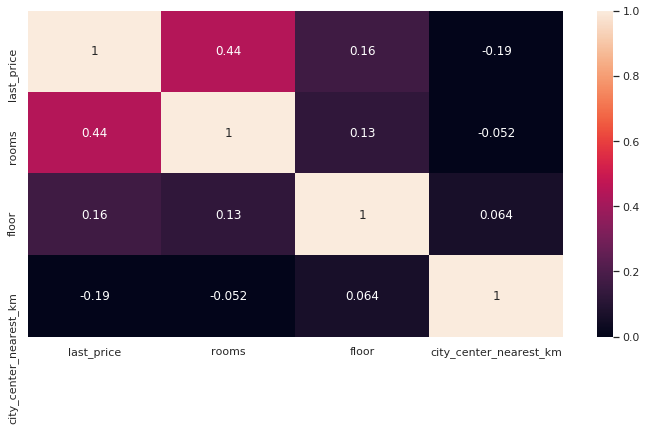

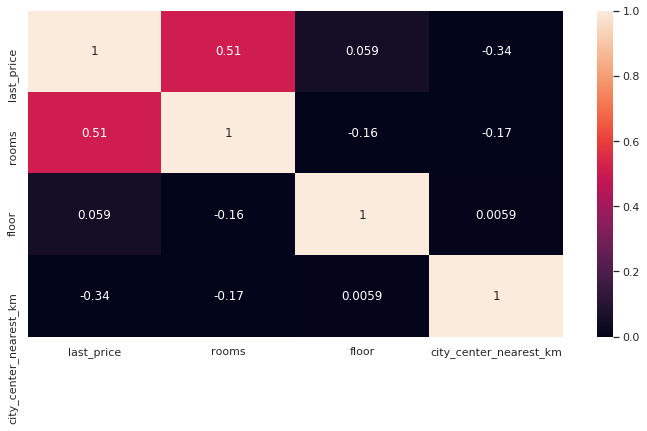

In [22]:
# Матрицы корреляции для обоих датасетов
plt.figure()
sns.set(rc = {'figure.figsize': (12, 6)})
sns.heatmap(pvt_properties_center[['last_price', 'rooms', 'floor', 'city_center_nearest_km', 'first_day_exposition']].corr(),
            annot=True,
            vmin=0,
            vmax=1);

plt.figure()
sns.set(rc = {'figure.figsize': (12, 6)})
sns.heatmap(df_properties[['last_price', 'rooms', 'floor', 'city_center_nearest_km', 'first_day_exposition']].corr(),
            annot=True,
            vmin=0,
            vmax=1);

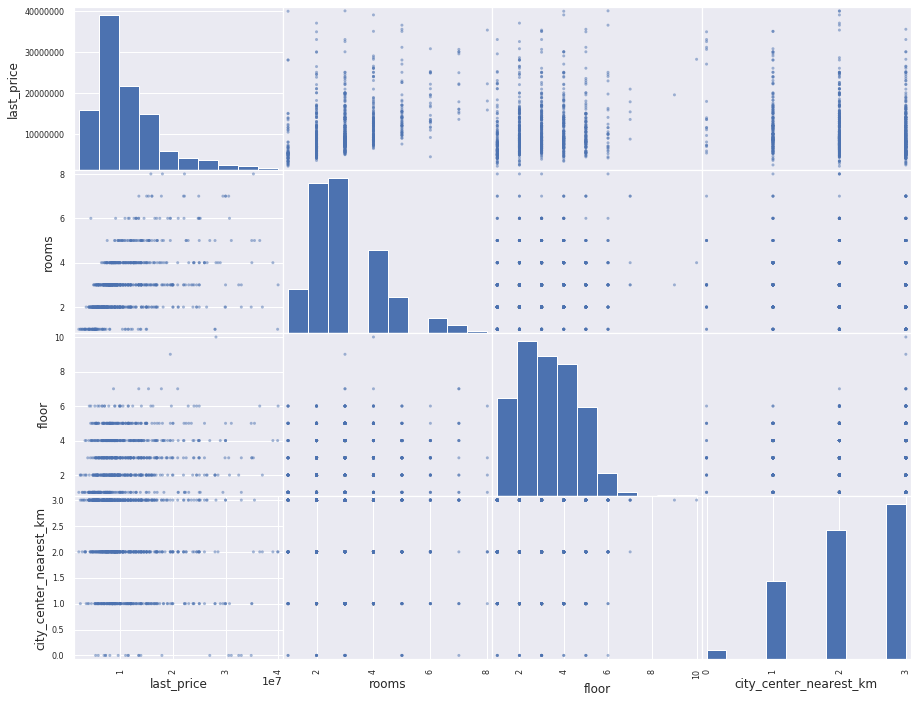

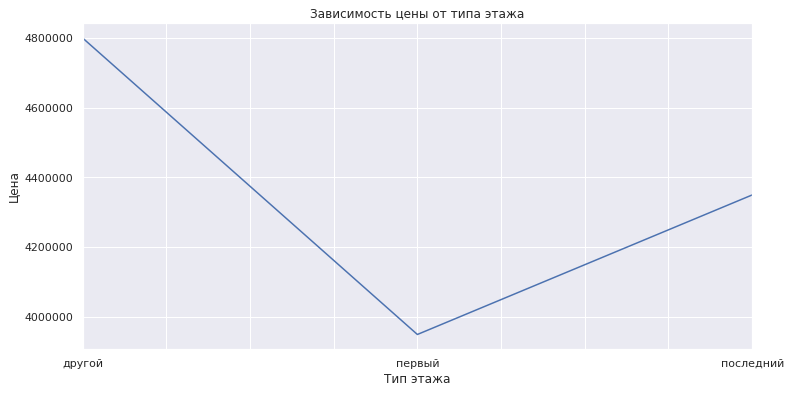

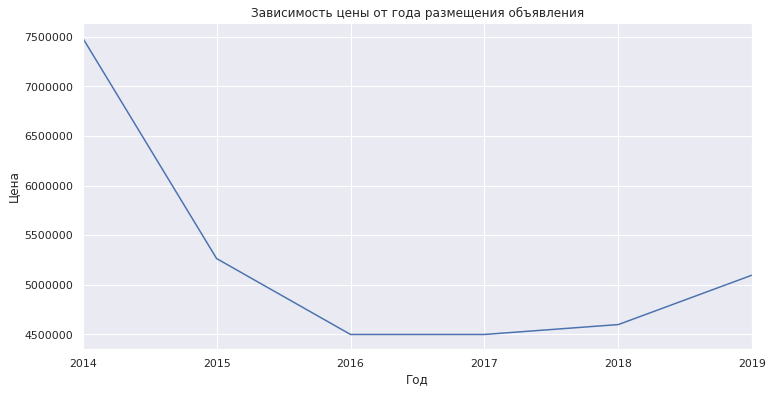

In [27]:
# Scatter plot
pd.plotting.scatter_matrix(pvt_properties_center[['last_price', 'rooms', 'floor', 'city_center_nearest_km', 'first_day_exposition']],
                           alpha=0.5,
                           figsize=(15, 12));
plt.show()

# Line plots for floor categories
df_properties.groupby('floor_type')['last_price'].median().plot()
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

# Similar for years
df_properties.groupby('year')['last_price'].median().plot()
plt.title('Зависимость цены от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

**Вывод:** для обоих датасетов количество комнат - основной фактор, который влияет на стоимость квартиры. Это ожидаемо, т.к. количество комнат также сильно связно с площадью квартиры.

Интересно, что этаж квартир становится сильно зависим от расстояния до центра для датасета с квартирами в центре. Скорей всего, это объясняется тем, что в центре запрещено стороить небоскребы, а значит там дома будут малоэтажные.

Также, для квартир в центре, расстояние до центра является менее значимым фактором, чем для квартир во всем датасете. Это, скорей всего, связано с тем, что разница в 1 или 5 км от центре перестает быть существенной. Тогда как разница в 25 км и 5 км может быть причиной большой разницы в цене.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ❌</b>

В этом разделе добавь графики, пожалуйста. Это позволит нам не ошибиться с выводом. Или ошибиться, но не так сильно :) 


не забудь про категории этажей и про год размещения.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Понятно, что ничего непонятно. Вывод про количество комнат все еще релевантен. Вывод про количество этажей - выглядит тоже (у нас нету ничего выше 6 этажей). А вот про расстояние до центра сказать сложно. С такой дискретизацией - непонятно.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 3 ✔️</b>
    
Я поэтому люблю для каждого параметра отдельно график строить :) </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 3  ❌</b>
    
Осталось рассмотреть зависимость от категории этажей и зависимость от года. Попробуй кривые, они тут лучше подойдут. Для этажей можно просто медианы или средние вывести. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Добавил - я пропустил это в задании, видимо. Зависимости повторяют то, что мы видели для полного датасета. Квартиры на первом этаже продаются с дисконтом и за последние 3 года цены выросли.

</div>

## Общий вывод

В ходе проекта мы провели большие раскопки: начали с выделения основных колонок, которые нужны для анализа; потом перешли к отчистке данных и восстановлению пропусков; потом добавили несколько calculated columns в датасет и, наконец, изучили распределения различных величин.

Из проекта видно, что стоимость квартир зависит от многих факторов. Некоторые из этих факторов достаточно очевидные (площадь, например), но некоторые могут иметь нетривиальные зависимости (например, расстояние до центра).

Основные характеристики для всей выборки:

In [24]:
display(round(df_properties[['total_area', 'last_price', 'rooms', 'first_day_exposition']].describe().loc[['max',
                                                                                                           'mean',
                                                                                                           '50%',
                                                                                                           'min',
                                                                                                           'std']]))

,total_area,last_price,rooms
max,298.0,39990000.0,10.0
mean,59.0,5924911.0,2.0
50%,52.0,4650000.0,2.0
min,12.0,1010000.0,1.0
std,28.0,4475396.0,1.0


Основные характеристики для квартир в центре:

In [25]:
display(round(pvt_properties_center[['total_area', 'last_price', 'rooms', 'first_day_exposition']].describe().loc[['max',
                                                                                                           'mean',
                                                                                                           '50%',
                                                                                                           'min',
                                                                                                           'std']]))

,total_area,last_price,rooms
max,298.0,39990000.0,8.0
mean,90.0,11256781.0,3.0
50%,82.0,9350000.0,3.0
min,12.0,2100000.0,1.0
std,42.0,6343158.0,1.0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 2 ⚠️</b>
    
Вывод хороший. В идеале стоит добавить медианы основных характеристик квартир для центра и для всей выборки, чтобы заказчику было понятно не только то, что квартиры в центре больше и дороже, но и насколько они больше и насколько дороже.
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера 3 ✔️</b>
    
Хорошо. </div>